# Diabetes Prediction

In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('pima-indians-diabetes.csv') # reading data

In [3]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,Is Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,Is Diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# looking at variance of columns

data.var()

Number of times pregnant                             11.354056
Plasma glucose concentration                       1022.248314
Diastolic blood pressure (mm Hg)                    374.647271
Triceps skinfold thickness (mm)                     254.473245
2-Hour serum insulin (mu U/ml)                    13281.180078
Body mass index (weight in kg/(height in m)^2)       62.159984
Diabetes pedigree function                            0.109779
Age                                                 138.303046
Is Diabetic                                           0.227483
dtype: float64

**Data is varying a lot so we have to scale the data, we will do this later.**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Number of times pregnant                        768 non-null    int64  
 1   Plasma glucose concentration                    768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                768 non-null    int64  
 3   Triceps skinfold thickness (mm)                 768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                  768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)  768 non-null    float64
 6   Diabetes pedigree function                      768 non-null    float64
 7   Age                                             768 non-null    int64  
 8   Is Diabetic                                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 K

**It looks like there is no missing data in columns.**

In [7]:
data.isnull().sum()

Number of times pregnant                          0
Plasma glucose concentration                      0
Diastolic blood pressure (mm Hg)                  0
Triceps skinfold thickness (mm)                   0
2-Hour serum insulin (mu U/ml)                    0
Body mass index (weight in kg/(height in m)^2)    0
Diabetes pedigree function                        0
Age                                               0
Is Diabetic                                       0
dtype: int64

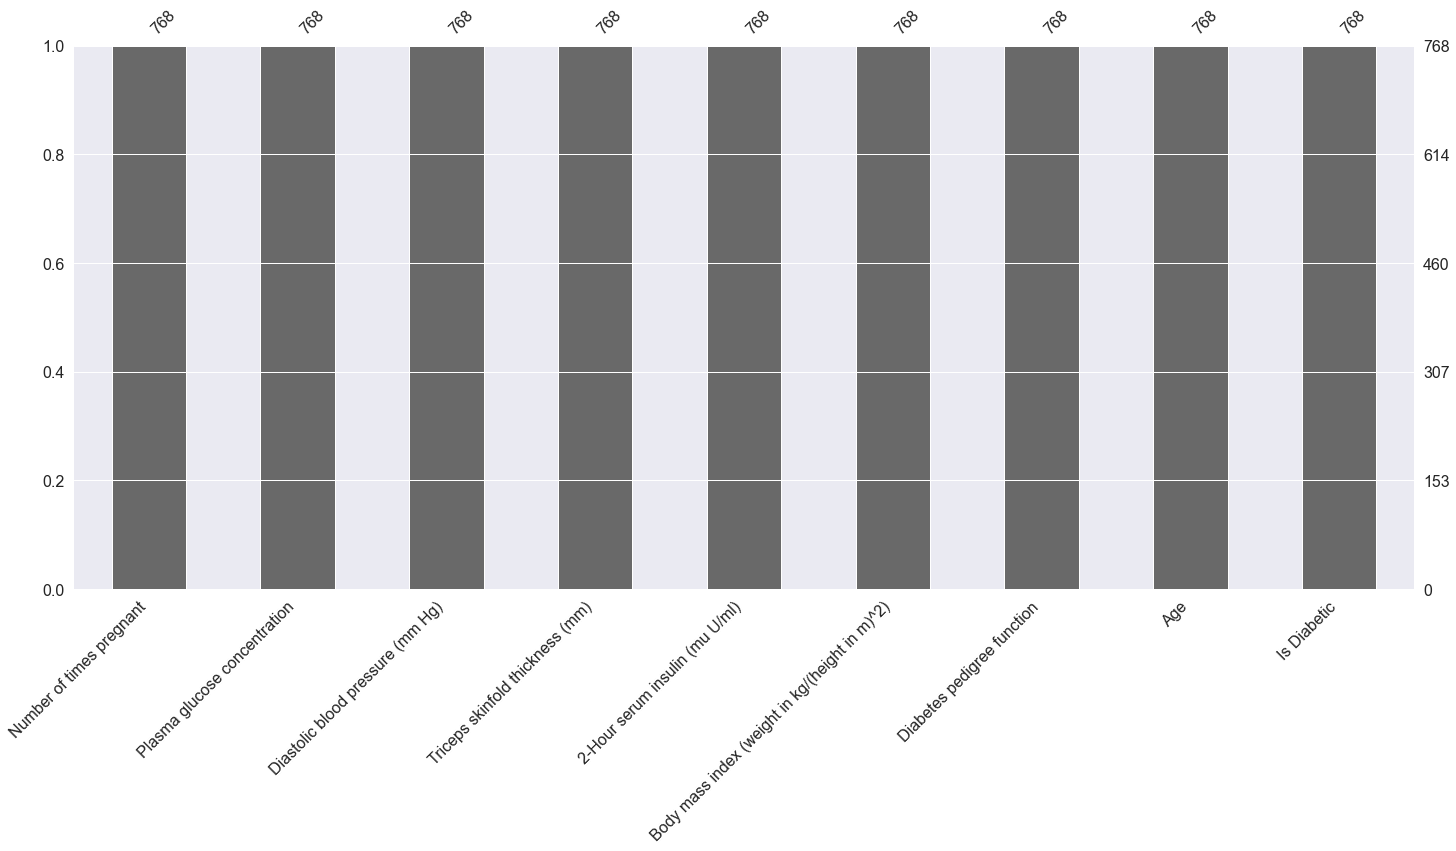

In [8]:
# visualizing null values

import missingno as msno

msno.bar(data)
plt.show()

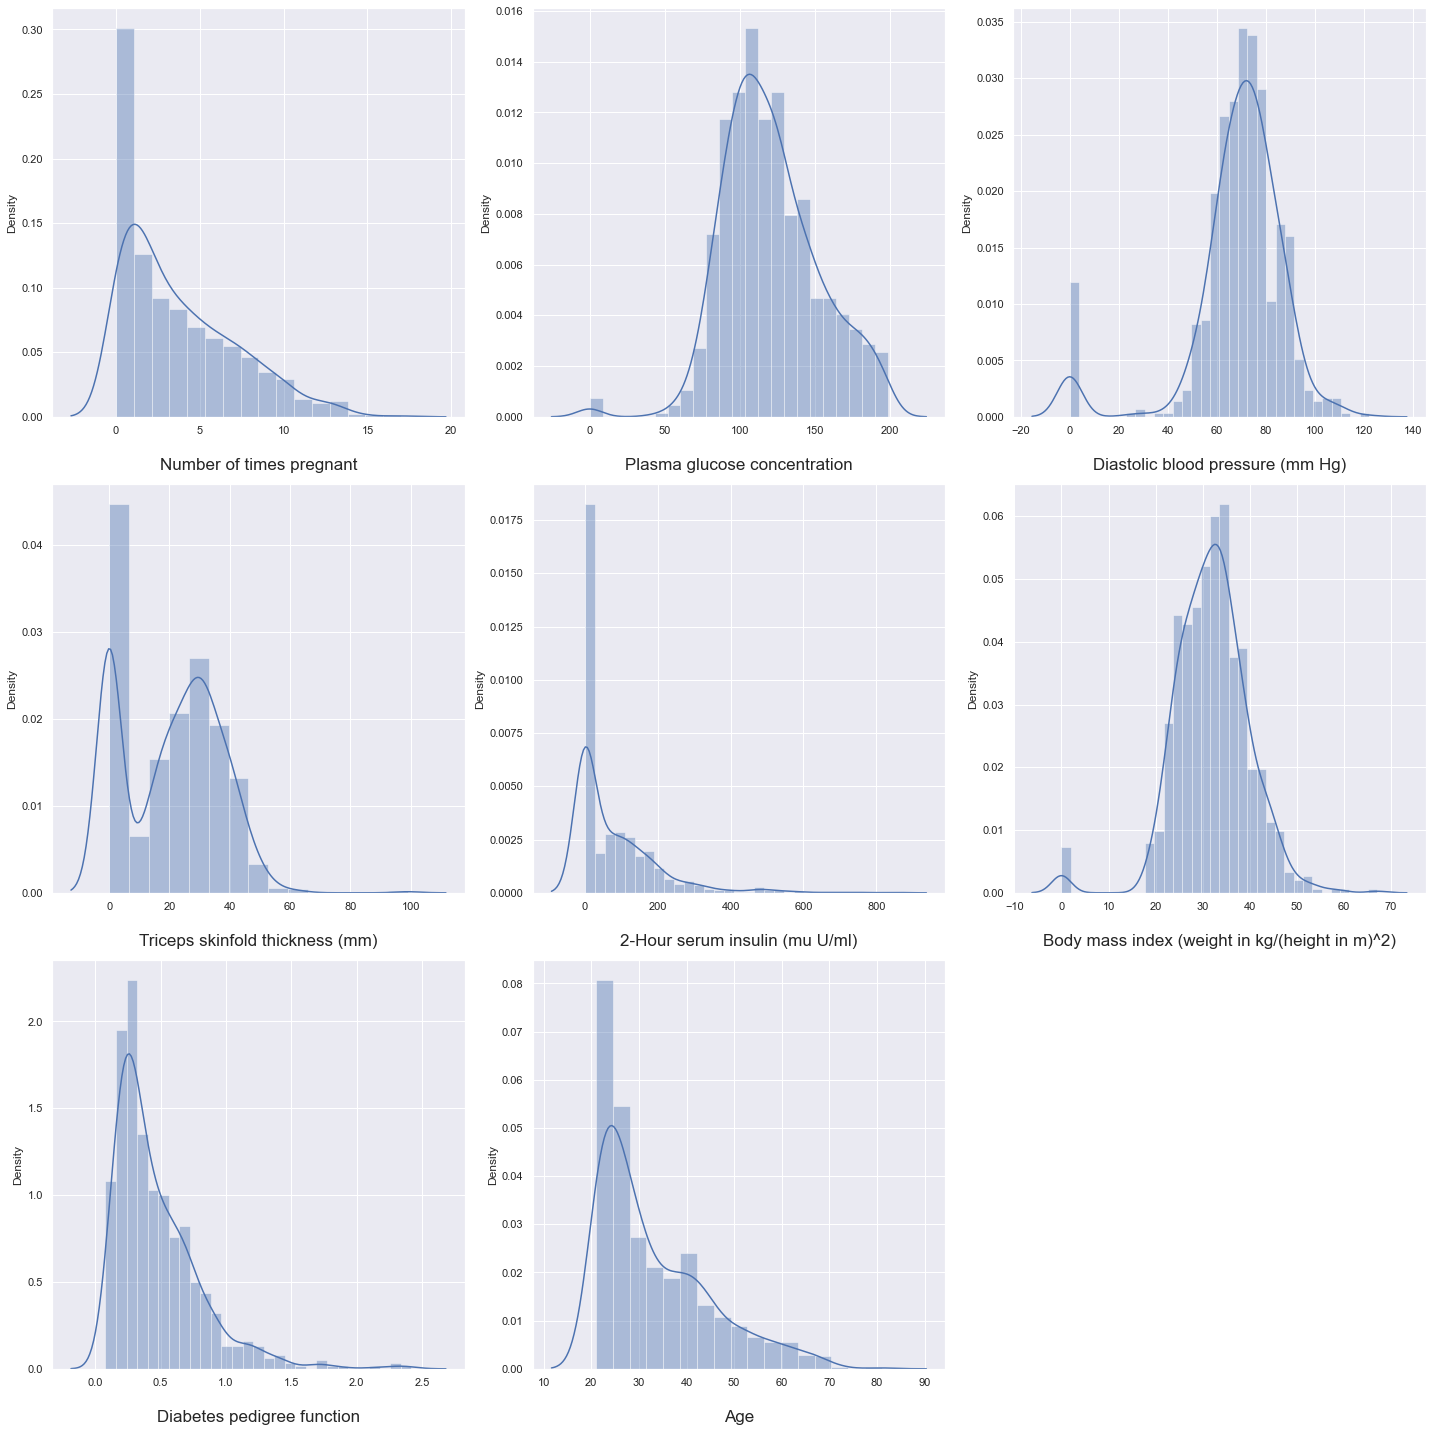

In [9]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20, 20))
plotnumber = 1

for col in data:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[col])
        plt.xlabel('\n' + col, fontsize = 17)
        
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Many columns contains 0 values which is not acceptable so we will first replace 0 values to NaN values and then fill null values with mean or mode of that column.

In [10]:
cols = ['Plasma glucose concentration', 'Diastolic blood pressure (mm Hg)', 'Triceps skinfold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)', 'Body mass index (weight in kg/(height in m)^2)', 'Diabetes pedigree function', 'Age']

In [11]:
# replacing 0 values with Nan

for col in cols:
    data[col] = data[col].replace(0, np.nan)

In [12]:
# checking for null values again

data.isna().sum()

Number of times pregnant                            0
Plasma glucose concentration                        5
Diastolic blood pressure (mm Hg)                   35
Triceps skinfold thickness (mm)                   227
2-Hour serum insulin (mu U/ml)                    374
Body mass index (weight in kg/(height in m)^2)     11
Diabetes pedigree function                          0
Age                                                 0
Is Diabetic                                         0
dtype: int64

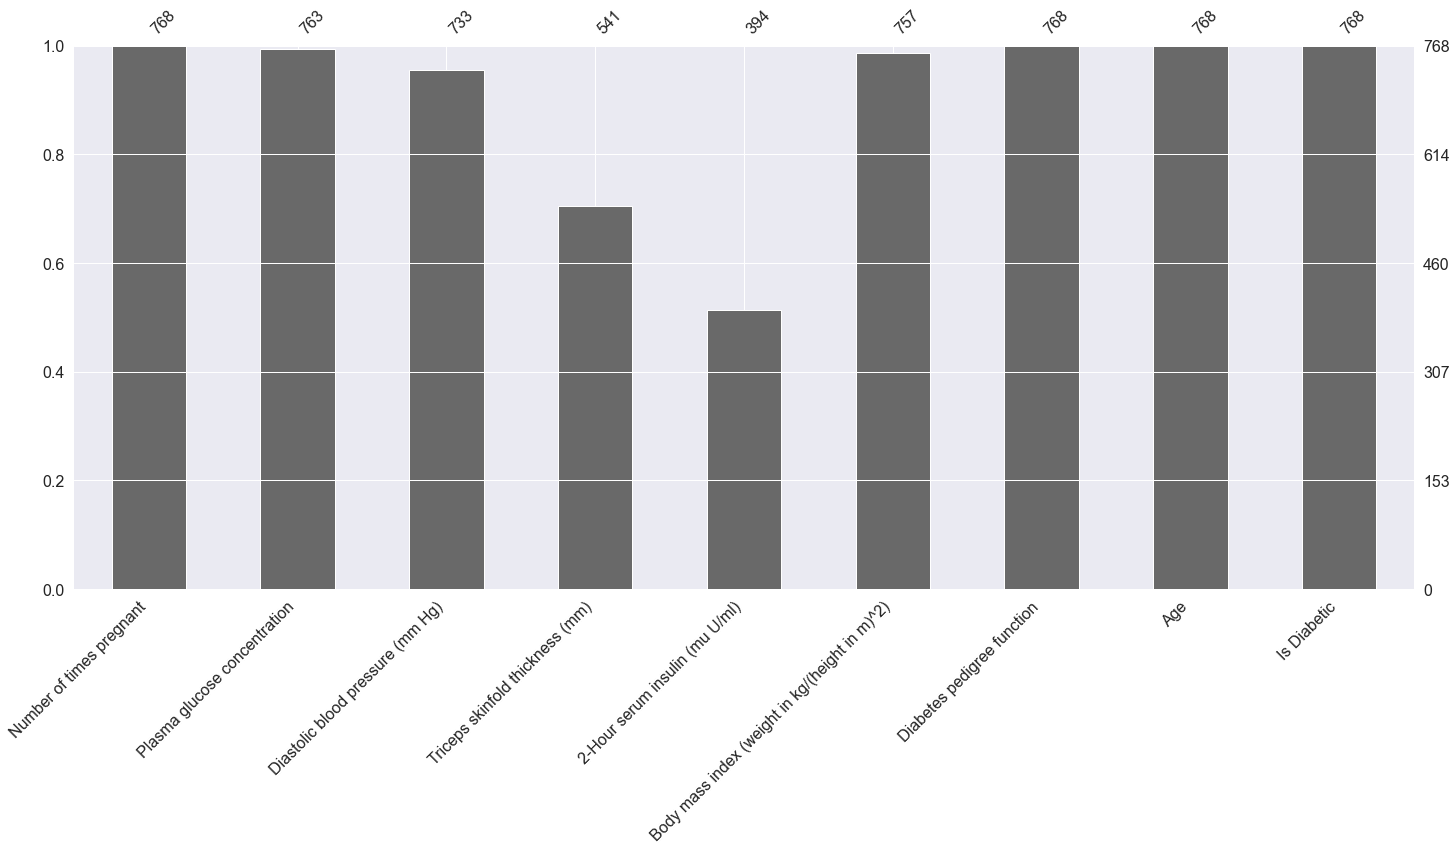

In [13]:
# visualizing null values

msno.bar(data)
plt.show()

In [14]:
# imputing the missing values

data['Plasma glucose concentration'].fillna(data['Plasma glucose concentration'].mean(), inplace = True)
data['Diastolic blood pressure (mm Hg)'].fillna(data['Diastolic blood pressure (mm Hg)'].mean(), inplace = True)
data['Triceps skinfold thickness (mm)'].fillna(data['Triceps skinfold thickness (mm)'].mean(), inplace = True)
data['2-Hour serum insulin (mu U/ml)'].fillna(data['2-Hour serum insulin (mu U/ml)'].mean(), inplace = True)
data['Body mass index (weight in kg/(height in m)^2)'].fillna(data['Body mass index (weight in kg/(height in m)^2)'].mean(), inplace = True)

In [15]:
# checking for missing values after imputation

data.isna().sum()

Number of times pregnant                          0
Plasma glucose concentration                      0
Diastolic blood pressure (mm Hg)                  0
Triceps skinfold thickness (mm)                   0
2-Hour serum insulin (mu U/ml)                    0
Body mass index (weight in kg/(height in m)^2)    0
Diabetes pedigree function                        0
Age                                               0
Is Diabetic                                       0
dtype: int64

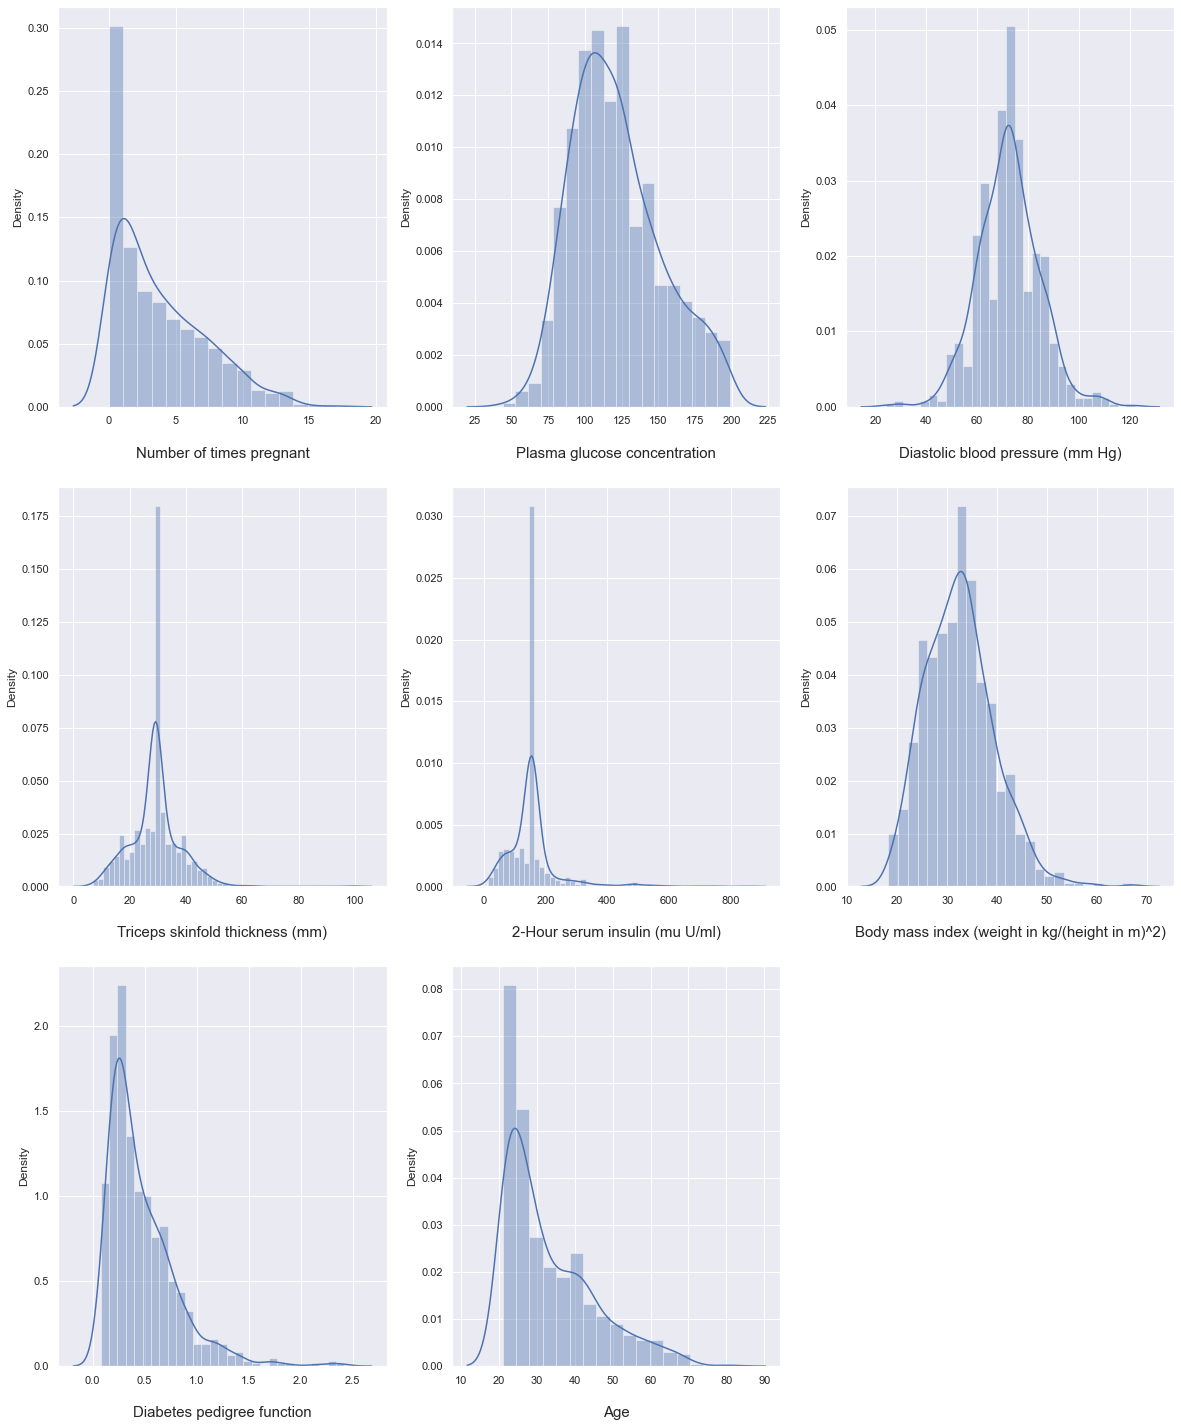

In [16]:
# data distribution

plt.figure(figsize = (20, 25))
plotnumber = 1

for col in data:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[col])
        plt.xlabel('\n' + col, fontsize = 15)
        
        
    plotnumber += 1
    
plt.show()

Now our data looks much beter, let's look for outliers now.

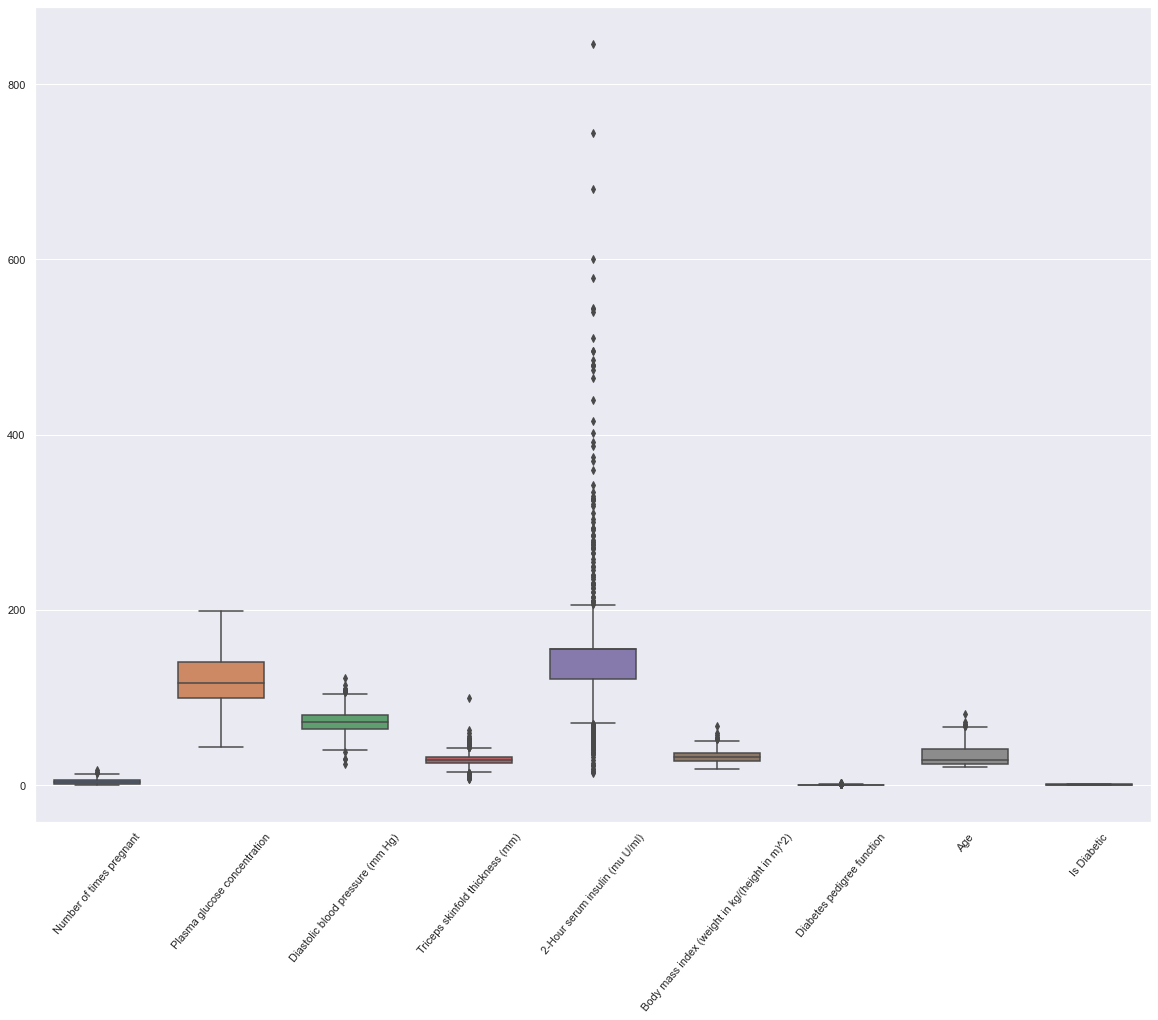

In [17]:
fig, ax = plt.subplots(figsize = (20, 15))

sns.boxplot(data = data, width = 0.7, ax = ax)
plt.xticks(rotation = 50)

plt.show()

Some of the columns have outliers let's handle them.

In [18]:
outlier = data['Diastolic blood pressure (mm Hg)'].quantile(0.99)
# removing the top 1% data from the 'Diastolic blood pressure (mm Hg)'' column
data = data[data['Diastolic blood pressure (mm Hg)'] < outlier]

outlier = data['Triceps skinfold thickness (mm)'].quantile(0.98)
# removing the top 2% data from the 'Triceps skinfold thickness (mm)' column
data = data[data['Triceps skinfold thickness (mm)'] < outlier]

outlier = data['2-Hour serum insulin (mu U/ml)'].quantile(0.94)
# removing the top 6% data from the '2-Hour serum insulin (mu U/ml)' column
data = data[data['2-Hour serum insulin (mu U/ml)'] < outlier]

outlier = data['Body mass index (weight in kg/(height in m)^2)'].quantile(0.99)
# removing the top 1% data from the 'Body mass index (weight in kg/(height in m)^2)' column
data = data[data['Body mass index (weight in kg/(height in m)^2)'] < outlier]

outlier = data['Age'].quantile(0.99)
# removing the top 1% data from the 'Age' column
data = data[data['Age'] < outlier]

Let's look at data after removal of outliers.

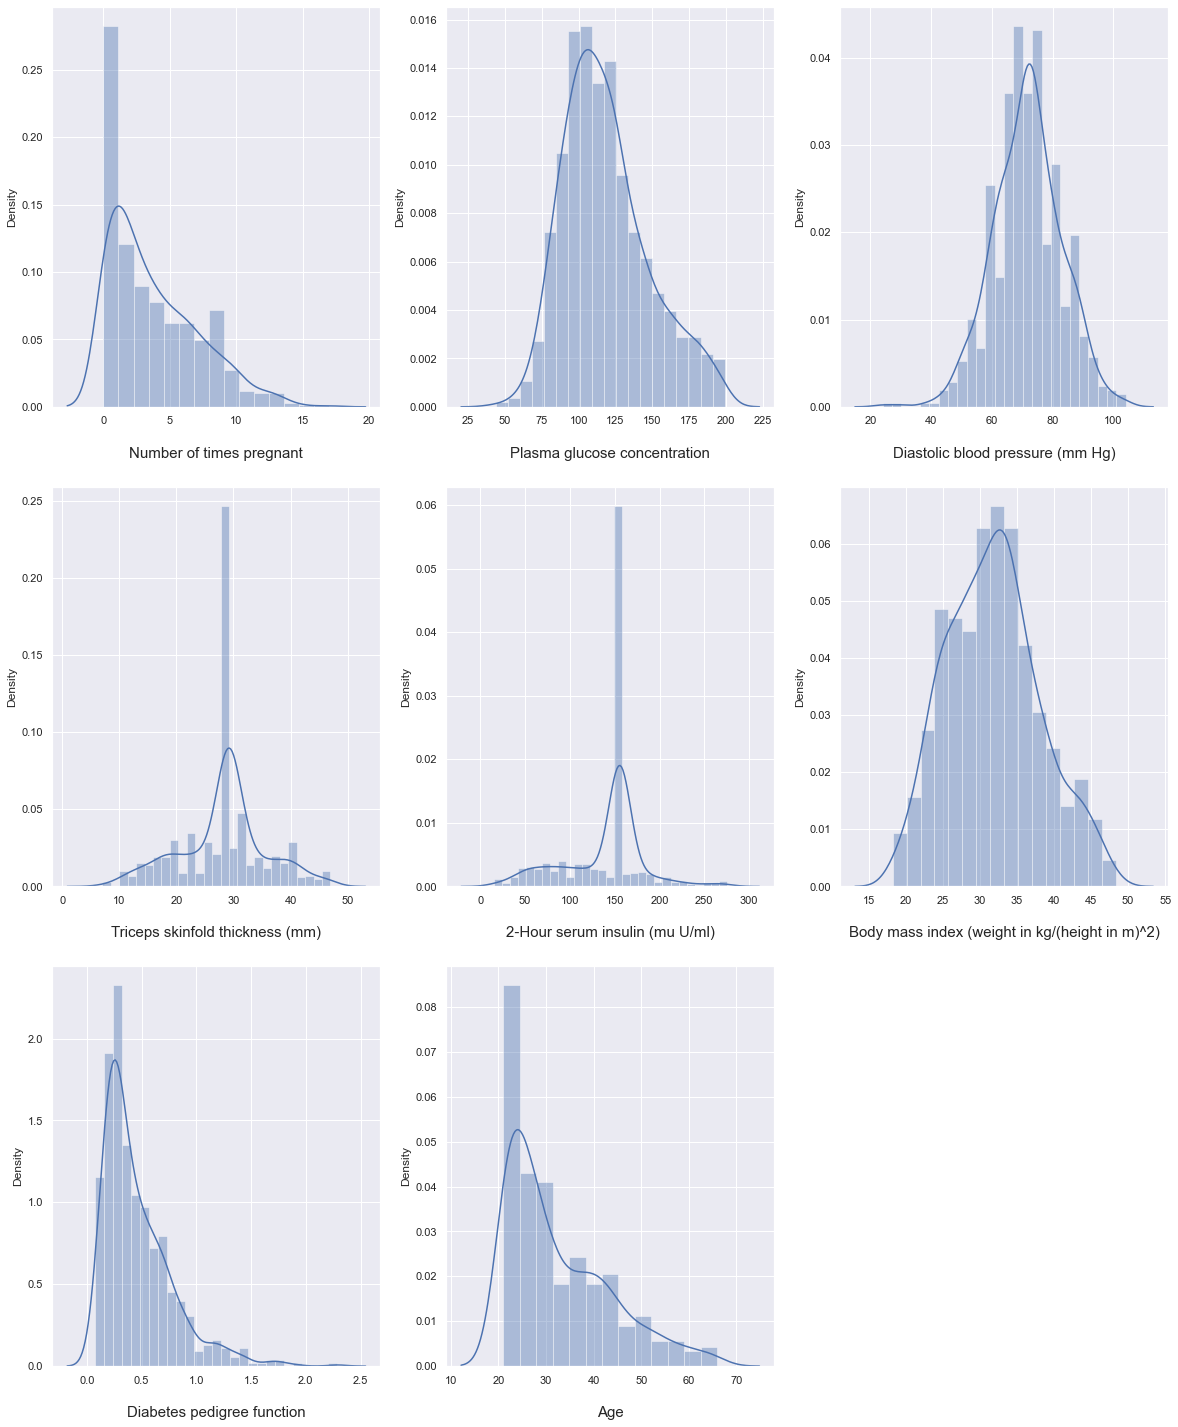

In [19]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for col in data:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[col])
        plt.xlabel('\n' + col, fontsize = 15)
        
        
    plotnumber += 1
    
plt.show()

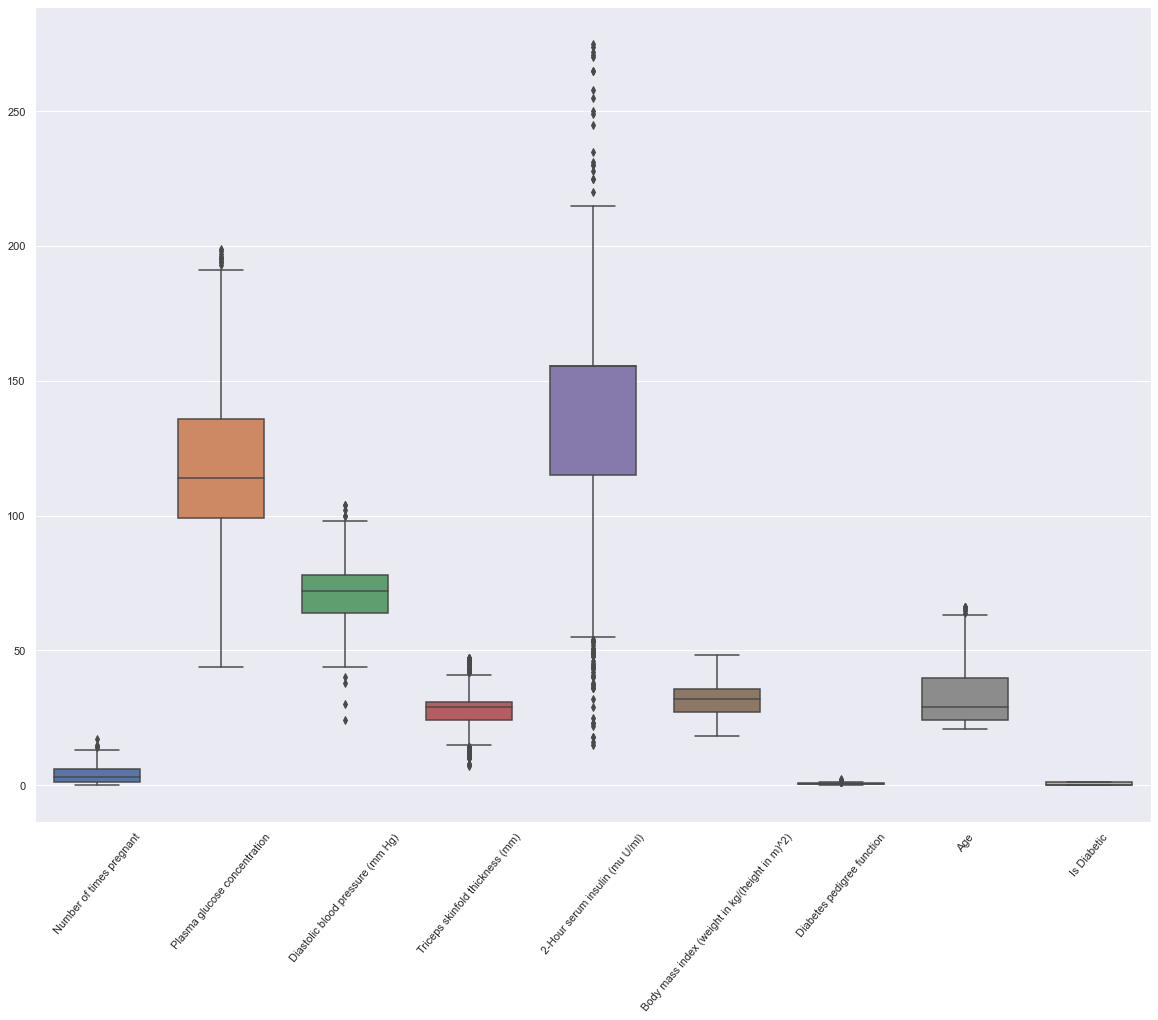

In [20]:
fig, ax = plt.subplots(figsize = (20, 15))

sns.boxplot(data = data, width = 0.7, ax = ax)
plt.xticks(rotation = 50)

plt.show()

Now data looks much more better.

<AxesSubplot:>

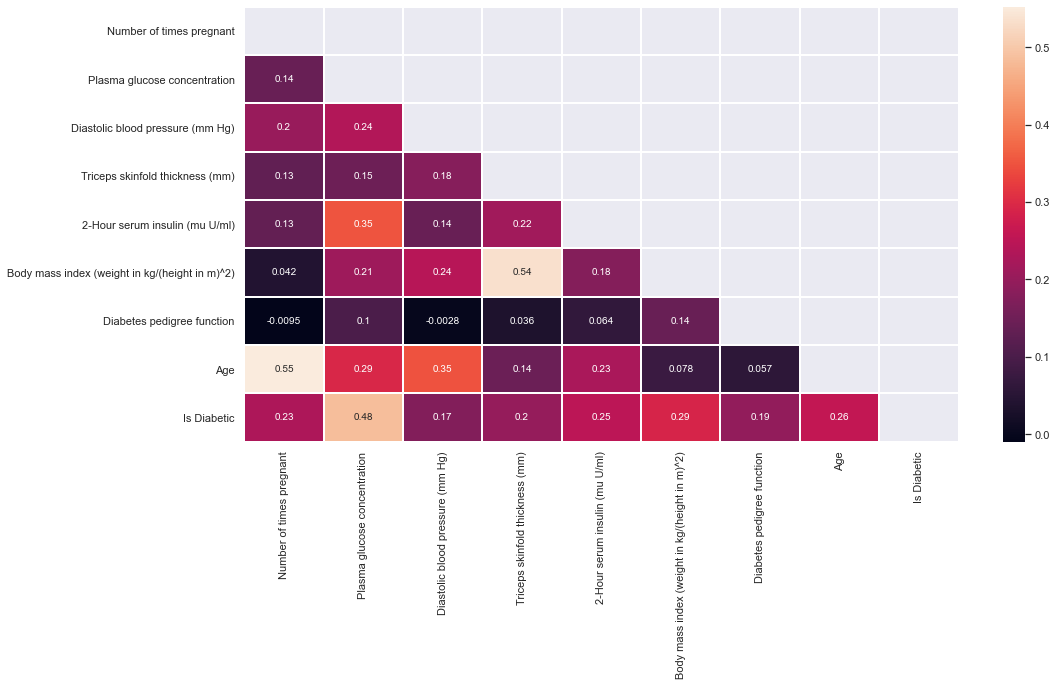

In [21]:
plt.figure(figsize = (16, 8))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)

In [22]:
# creating features and label 

X = data.drop(columns = 'Is Diabetic')
y = data['Is Diabetic']

In [23]:
# splitting data into training and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [24]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.54929566, -0.43437292, -1.4299072 , ..., -0.46422323,
        -0.11349743, -0.98505844],
       [-1.13307625, -0.46914588, -0.34699043, ..., -1.90695249,
        -0.72221462, -0.98505844],
       [-0.54929566, -0.64301066, -0.52747656, ...,  0.16095944,
         1.29936719, -0.432711  ],
       ...,
       [-1.13307625, -0.36482701, -0.34699043, ..., -0.73673876,
         1.04306522, -0.06447938],
       [-0.84118595,  0.40017801, -1.06893494, ..., -0.52834453,
         0.73870663, -1.07711635],
       [ 0.91015581, -0.15618928,  0.37495408, ..., -1.29780014,
         0.01465355, -0.15653728]])

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = log_reg.predict(X_test)

In [30]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg_train_acc = accuracy_score(y_train, log_reg.predict(X_train))
log_reg_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {log_reg_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {log_reg_test_acc}")

Training Accuracy of Logistic Regression Model is 0.770042194092827
Test Accuracy of Logistic Regression Model is 0.7598039215686274


In [31]:
# confusion matrix 

confusion_matrix(y_test, y_pred)

array([[120,  19],
       [ 30,  35]], dtype=int64)

In [33]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       139
           1       0.65      0.54      0.59        65

    accuracy                           0.76       204
   macro avg       0.72      0.70      0.71       204
weighted avg       0.75      0.76      0.75       204



## K Neighbors Classifier (KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn.predict(X_test)

In [36]:
# accuracy score

knn_train_acc = accuracy_score(y_train, log_reg.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.770042194092827
Test Accuracy of KNN Model is 0.7058823529411765


In [37]:
# confusion matrix 

confusion_matrix(y_test, y_pred)

array([[108,  31],
       [ 29,  36]], dtype=int64)

In [38]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       139
           1       0.54      0.55      0.55        65

    accuracy                           0.71       204
   macro avg       0.66      0.67      0.66       204
weighted avg       0.71      0.71      0.71       204



## Support Vector Classifier

In [42]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [43]:
y_pred = svc.predict(X_test)

In [44]:
# accuracy score

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.7616033755274262
Test Accuracy of SVC Model is 0.7401960784313726


In [45]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[122,  17],
       [ 36,  29]], dtype=int64)

In [49]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       139
           1       0.54      0.54      0.54        65

    accuracy                           0.71       204
   macro avg       0.66      0.66      0.66       204
weighted avg       0.71      0.71      0.71       204



## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred = dtc.predict(X_test)

In [48]:
# accuracy score

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SVC Model is {dtc_train_acc}")
print(f"Test Accuracy of SVC Model is {dtc_test_acc}")

Training Accuracy of SVC Model is 1.0
Test Accuracy of SVC Model is 0.7058823529411765


In [50]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[109,  30],
       [ 30,  35]], dtype=int64)

In [51]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       139
           1       0.54      0.54      0.54        65

    accuracy                           0.71       204
   macro avg       0.66      0.66      0.66       204
weighted avg       0.71      0.71      0.71       204



In [52]:
# hyper parameter tuning

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

In [53]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2529 out of 2560 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:    3.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [54]:
# best parameters

grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [55]:
# best score

grid_search.best_score_

0.765845464725644

In [56]:
dtc = grid_search.best_estimator_

In [58]:
y_pred = dtc.predict(X_test)

In [59]:
# accuracy score

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SVC Model is {dtc_train_acc}")
print(f"Test Accuracy of SVC Model is {dtc_test_acc}")

Training Accuracy of SVC Model is 0.8354430379746836
Test Accuracy of SVC Model is 0.7696078431372549


In [60]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[124,  15],
       [ 32,  33]], dtype=int64)

In [61]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       139
           1       0.69      0.51      0.58        65

    accuracy                           0.77       204
   macro avg       0.74      0.70      0.71       204
weighted avg       0.76      0.77      0.76       204



## Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
y_pred = rand_clf.predict(X_test)

In [65]:
# accuracy score

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 1.0
Test Accuracy of Random Forest Model is 0.7549019607843137


In [66]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[119,  20],
       [ 30,  35]], dtype=int64)

In [67]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       139
           1       0.64      0.54      0.58        65

    accuracy                           0.75       204
   macro avg       0.72      0.70      0.70       204
weighted avg       0.75      0.75      0.75       204



In [76]:
# hyper parameter tuning

grid_params = {
    'n_estimators' : [100, 120, 140, 180, 200],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : [1, 2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4, 5],
    'max_features' : ["auto", "sqrt", "log2"]
}

In [77]:
grid_search = GridSearchCV(rand_clf, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 2404 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 4804 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6304 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 8004 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 9904 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 12004 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 14304 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 14969 out of 15000 | elapsed:  3.5min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 15000 out of 15000 | elapsed:  3.5min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, min_samples_split=4,
                                              n_estimators=200),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 120, 140, 180, 200]},
             verbose=1)

In [78]:
# best parameters

grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

In [79]:
# best score

grid_search.best_score_

0.7890257558790593

In [80]:
rand_clf = grid_search.best_estimator_

In [82]:
# accuracy score

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.9430379746835443
Test Accuracy of Random Forest Model is 0.7549019607843137


In [83]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[119,  20],
       [ 30,  35]], dtype=int64)

In [86]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       139
           1       0.64      0.54      0.58        65

    accuracy                           0.75       204
   macro avg       0.72      0.70      0.70       204
weighted avg       0.75      0.75      0.75       204



# Ada Boost Classifier

In [88]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.3s finished


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                min_samples_leaf=5,
                                                                                min_samples_split=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [89]:
# best parameter

grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 200}

In [90]:
# best_score 

grid_search.best_score_

0.7848600223964166

In [91]:
ada = grid_search.best_estimator_

In [93]:
# accuracy score

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {ada_train_acc}")
print(f"Test Accuracy of Random Forest Model is {ada_test_acc}")

Training Accuracy of Random Forest Model is 0.9282700421940928
Test Accuracy of Random Forest Model is 0.7549019607843137


In [94]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[119,  20],
       [ 30,  35]], dtype=int64)

In [95]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       139
           1       0.64      0.54      0.58        65

    accuracy                           0.75       204
   macro avg       0.72      0.70      0.70       204
weighted avg       0.75      0.75      0.75       204



## Gradient Boosting Classifier

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [100]:
grid_search.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 100}

In [102]:
gb = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 100)
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [103]:
y_pred = gb.predict(X_test)

In [104]:
# accuracy score

gb_train_acc = accuracy_score(y_train, gb.predict(X_train))
gb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {gb_train_acc}")
print(f"Test Accuracy of Random Forest Model is {gb_test_acc}")

Training Accuracy of Random Forest Model is 0.9493670886075949
Test Accuracy of Random Forest Model is 0.7794117647058824


In [105]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[121,  18],
       [ 27,  38]], dtype=int64)

In [106]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       139
           1       0.68      0.58      0.63        65

    accuracy                           0.78       204
   macro avg       0.75      0.73      0.74       204
weighted avg       0.77      0.78      0.77       204



## Stochastic Gradient Boosting (SGB)

In [107]:
sgbc = GradientBoostingClassifier(learning_rate = 0.1, subsample = 0.9, max_features = 0.75, loss = 'deviance',
                                  n_estimators = 100)

sgbc.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.75, subsample=0.9)

In [108]:
y_pred = sgbc.predict(X_test)

In [109]:
# accuracy score

sgbc_train_acc = accuracy_score(y_train, sgbc.predict(X_train))
sgbc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {sgbc_train_acc}")
print(f"Test Accuracy of Random Forest Model is {sgbc_test_acc}")

Training Accuracy of Random Forest Model is 0.9493670886075949
Test Accuracy of Random Forest Model is 0.7598039215686274


In [110]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[116,  23],
       [ 26,  39]], dtype=int64)

In [111]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       139
           1       0.63      0.60      0.61        65

    accuracy                           0.76       204
   macro avg       0.72      0.72      0.72       204
weighted avg       0.76      0.76      0.76       204



## Extreme Gradient Boosting (XGBoost) 

In [115]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[23:21:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
y_pred = xgb.predict(X_test)

In [117]:
# accuracy score

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {xgb_train_acc}")
print(f"Test Accuracy of Random Forest Model is {xgb_test_acc}")

Training Accuracy of Random Forest Model is 1.0
Test Accuracy of Random Forest Model is 0.7401960784313726


In [118]:
grid_params = {
    'n_estimators' : [10, 50, 100, 200],
    'max_depth' : [3, 5, 10, 20],
    'learning_rate' : [1, 0.5, 0.1, 0.01, 0.001],
    'booster' : ['gbtree', 'gblinear', 'dart']
}

In [119]:
grid_search = GridSearchCV(XGBClassifier(objective = 'binary:logistic'), param_grid = grid_params, cv = 5,
                           n_jobs = -1, verbose = 3)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 501 tasks      | elapsed:    7.6s


[23:30:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   39.6s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [120]:
# best parameters 

grid_search.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 200}

In [121]:
# best score 

grid_search.best_score_

0.7869652855543113

In [126]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.01, max_depth = 5, n_estimators = 200)
xgb.fit(X_train, y_train)

[23:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
y_pred = xgb.predict(X_test)

In [128]:
# accuracy score

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {xgb_train_acc}")
print(f"Test Accuracy of Random Forest Model is {xgb_test_acc}")

Training Accuracy of Random Forest Model is 0.9177215189873418
Test Accuracy of Random Forest Model is 0.7450980392156863
